In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data=pd.read_csv('winequality-red.csv')

# Check data samples
Let's look at a few data samples with head() method.

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.shape

(1599, 12)

# Features

| Feature           | Significance  |
| ----------------- | ------------- |
| Fixed acidity     | Most acids involved with wine or fixed or nonvolatile (do not evaporate readily)  |
| Volitile acidity  | The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste  |
| Citric acid       |  Found in small quantities, citric acid can add 'freshness' and flavor to wines     |
| Residual sugar    |  it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet. |
| Chlorides         |  The amount of salt in the wine. |
| Free sulphur dioxide | The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. |
| Total sulphur dioxide | Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. |
| Density           |  The density of water is close to that of water depending on the percent alcohol and sugar content. |
| pH                |  Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.              |
| Sulphates         | Wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant. |
| Alcohol           | The percentage of alcohol contents in the wine.              |

In [6]:
feature_list = data.columns[:-1].values
label = [data.columns[-1]]

print ("Feature list:", feature_list)
print ("Label:", label)

Feature list: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


# Data statistics
Let's use info() method to get quick description of data.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


*  Total entries: 1599 (Tiny dataset by ML standard)
*  There are total 12 columns: 11 features + 1 label
*    Label column: quality
*    Features: [fixed acidity, volitile acidity, citric acid, residual sugar, cholrides, free sulphur dioxide, total sulphur dioxide,      density, pH, sulphates, alcohol]
*  All columns are numeric (float64) and label is an integer.

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* This one prints count and statistical properties - mean, standard deviations and quartiles.

* The wine quality can be between 0 and 10, but in this dataset, the quality values are between 3 and 8. Let's look at the distribution of examples by the wine quality.

In [9]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

* High quality value --> better quality of wine
* You can see that there are lots of samples of average wines than good or the poor quality ones.
* Many examples with quality = 5 or 6

# The information can be viewed through histogram plot.
* 
* A Histogram gives the count of how many samples occurs within a specific range (bins).
* The x-axis denotes the range of values in a feature and
* The y-axis denotes the frequency of samples with those specific values.

In [10]:
sns.set()

Text(0, 0.5, 'Count')

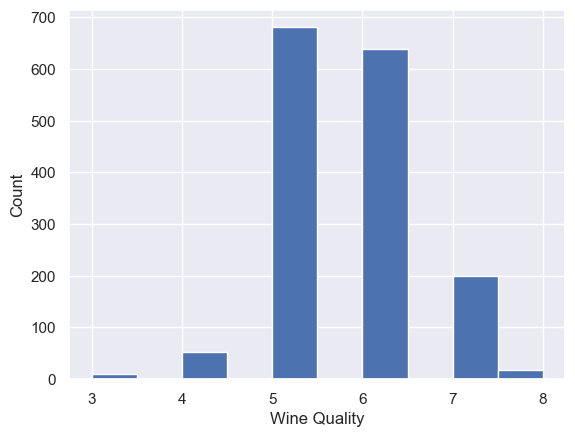

In [11]:
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

Note taller bars for quality 5 and 6 compared to the

In a similar manner, we can plot all numerical attributes with histogram plot for quick examination.

In [12]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

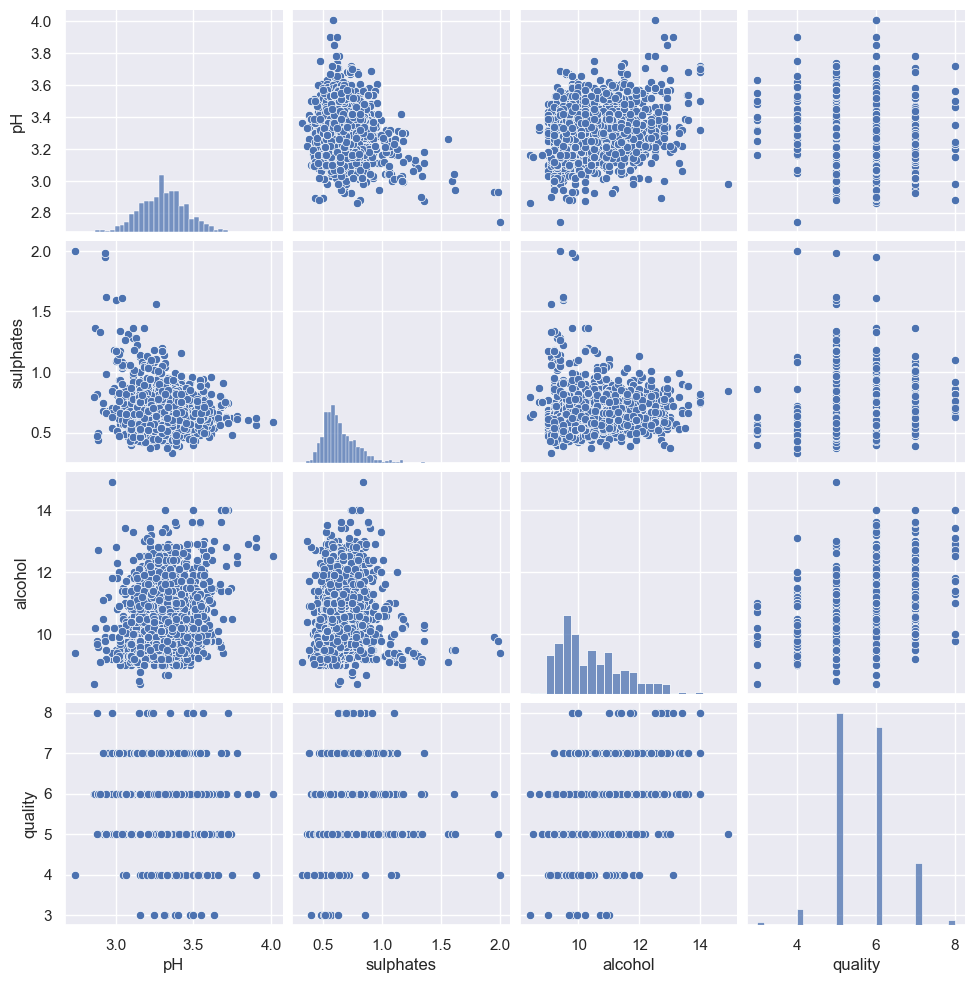

In [13]:
subset = ['pH', 'sulphates', 'alcohol', 'quality']  # замініть на назви ваших змінних
sns.pairplot(data, vars=subset)
plt.show()

### A few observations based on these plots: 
* Features are at different scales.
* Features have different distributions -
* A few are tail heavy. e.g. residual sugar, free so2
* A few are multiple modes. e.g. volitile acidity, citric acid

# Create test set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# Stratified sampling
* Data distribution may not be uniform in real world data.
* Random sampling - by its nature - introduces biases in such data sets.

Text(0, 0.5, 'Count')

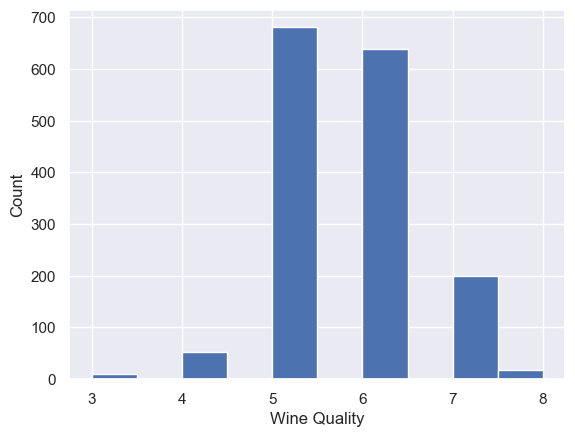

In [16]:
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

* Many examples of class 5 and 6 compared to the other classes.
* This causes a problem while random sampling. The test distribution may not match with the overall distribution.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(data, data["quality"]):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]

In [18]:
train_index, test_index= next(sss.split(data, data["quality"]))
strat_train_set = data.loc[train_index]
strat_test_set = data.loc[test_index]

In [19]:
strat_train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1542,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,6
1558,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,5
344,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70,6
924,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20,5
971,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1056,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.10,7
1394,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20,5
337,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30,5
539,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20,5


Let's examine the test set distribution by the wine quality that was used for stratified sampling.

In [20]:
strat_dist = strat_test_set["quality"].value_counts() / len(strat_test_set)

Now compare this with the overall distribution:

In [21]:
overall_dist = data["quality"].value_counts() / len(data)

Let's look at them side-by-side:

In [22]:
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(s-o)_pct'] = 100*(dist_comparison['diff(s-o)']/dist_comparison['overall'])

In [23]:
dist_comparison

,overall,stratified,diff(s-o),diff(s-o)_pct
quality,,,,
5,0.425891,0.425000,-0.000891,-0.209251
6,0.398999,0.400000,0.001001,0.250784
7,0.124453,0.125000,0.000547,0.439698
4,0.033146,0.034375,0.001229,3.708726
8,0.011257,0.009375,-0.001882,-16.718750
3,0.006254,0.006250,-0.000004,-0.062500


Let's contrast this with random sampling:

In [24]:
random_dist = test_set["quality"].value_counts() / len(test_set)
random_dist

quality
6    0.412500
5    0.406250
7    0.131250
4    0.031250
8    0.015625
3    0.003125
Name: count, dtype: float64

In [25]:
dist_comparison['random'] = random_dist
dist_comparison['diff(r-o)'] = dist_comparison['random'] - dist_comparison['overall']
dist_comparison['diff(r-o)_pct'] = 100*(dist_comparison['diff(r-o)']/dist_comparison['overall'])

# Sampling bias comparison
* Compare the difference in distribution of stratified and uniform sampling:
 
* Stratified sampling gives us test distribution closer to the overall distribution than the random sampling.

In [26]:
dist_comparison.loc[:, ['diff(s-o)_pct', 'diff(r-o)_pct']]

,diff(s-o)_pct,diff(r-o)_pct
quality,,
5,-0.209251,-4.611784
6,0.250784,3.383621
7,0.439698,5.461683
4,3.708726,-5.719340
8,-16.718750,38.802083
3,-0.062500,-50.031250


# Step 3: Data visualization

* Performed on training set.
* In case of large training set -
  * Sample examples to form **exploration set**.
* Enables to understand features and their relationship among themselves and with output label.

In [27]:
exploration_set = strat_train_set.copy()

<Axes: xlabel='fixed acidity', ylabel='density'>

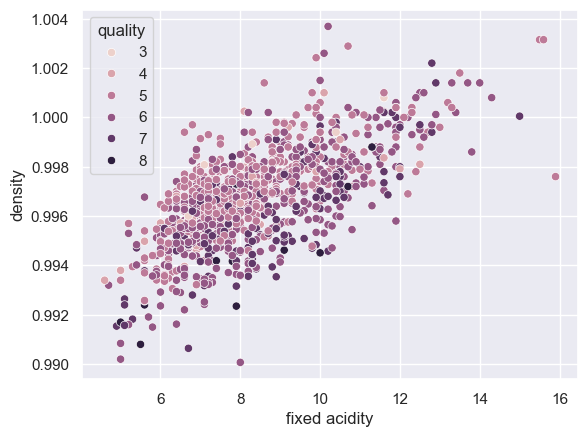

In [28]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality',
                data=exploration_set)

<Axes: xlabel='fixed acidity', ylabel='density'>

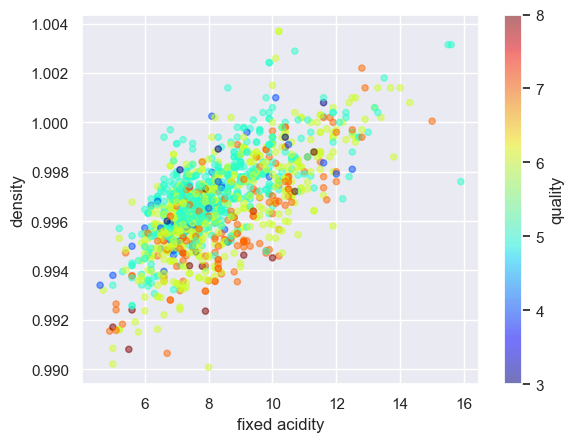

In [29]:
exploration_set.plot(kind='scatter', x='fixed acidity', y='density', alpha=0.5,
                     c="quality", cmap=plt.get_cmap("jet"))

[Text(0.5, 55.249999999999986, ''), Text(167.25, 0.5, '')]

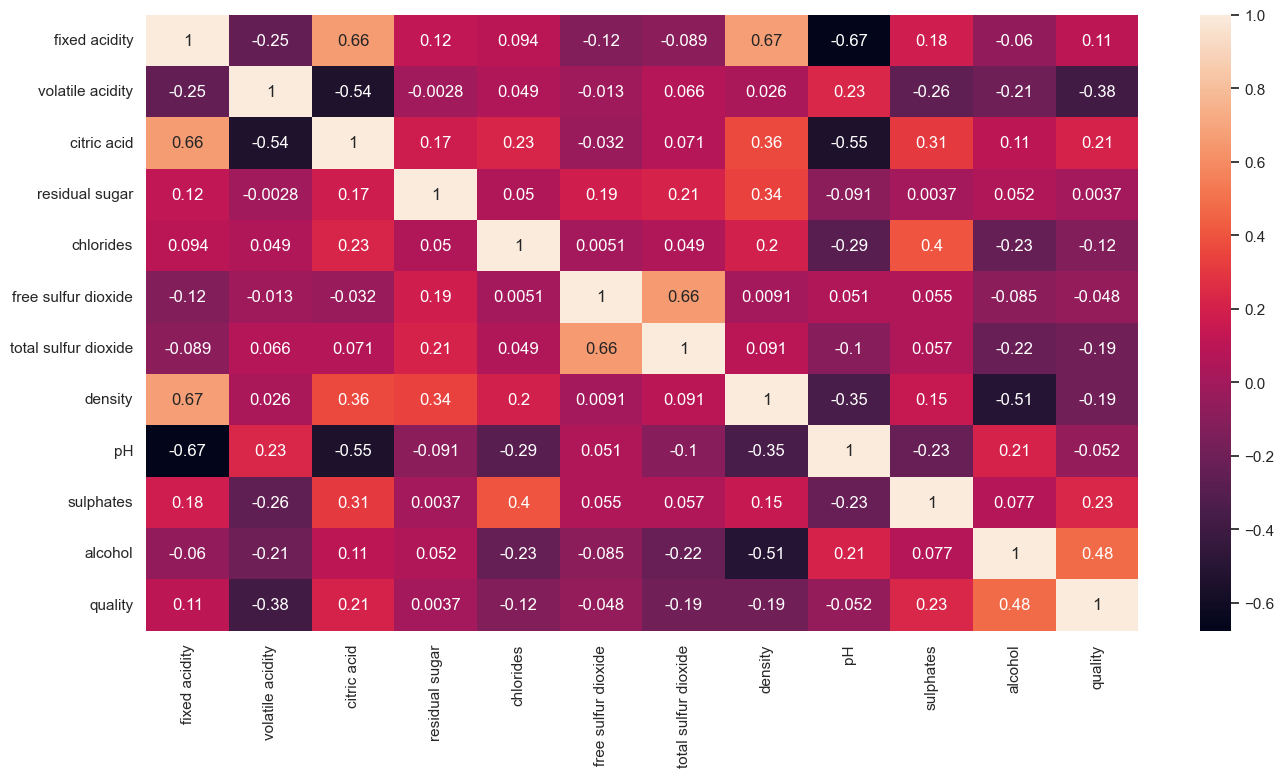

In [30]:
corr_matrix = exploration_set.corr()
plt.figure(figsize = (16,8))
ax = sns.heatmap(corr_matrix, annot=True)
ax.set(xlabel="", ylabel="")


In [31]:
corr_matrix['quality']

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

Notice that quality has strong positive correlation with alcohol content [0.48] and strong negative correlation with volitile acidity [-0.38].

<Axes: >

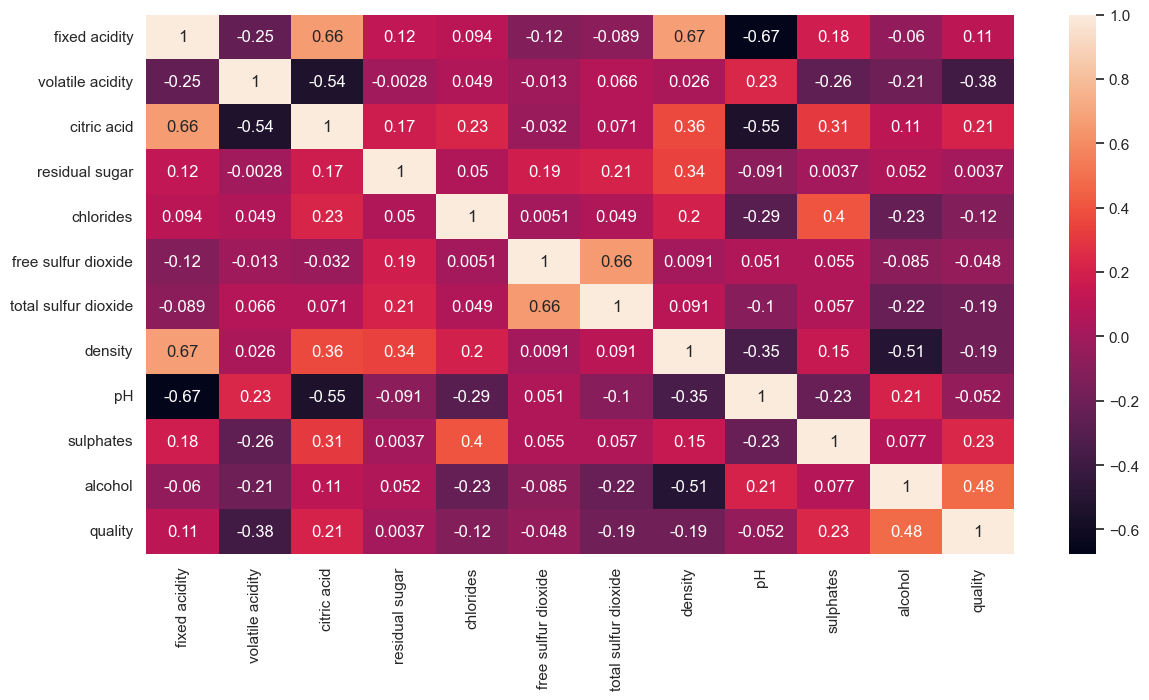

In [32]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

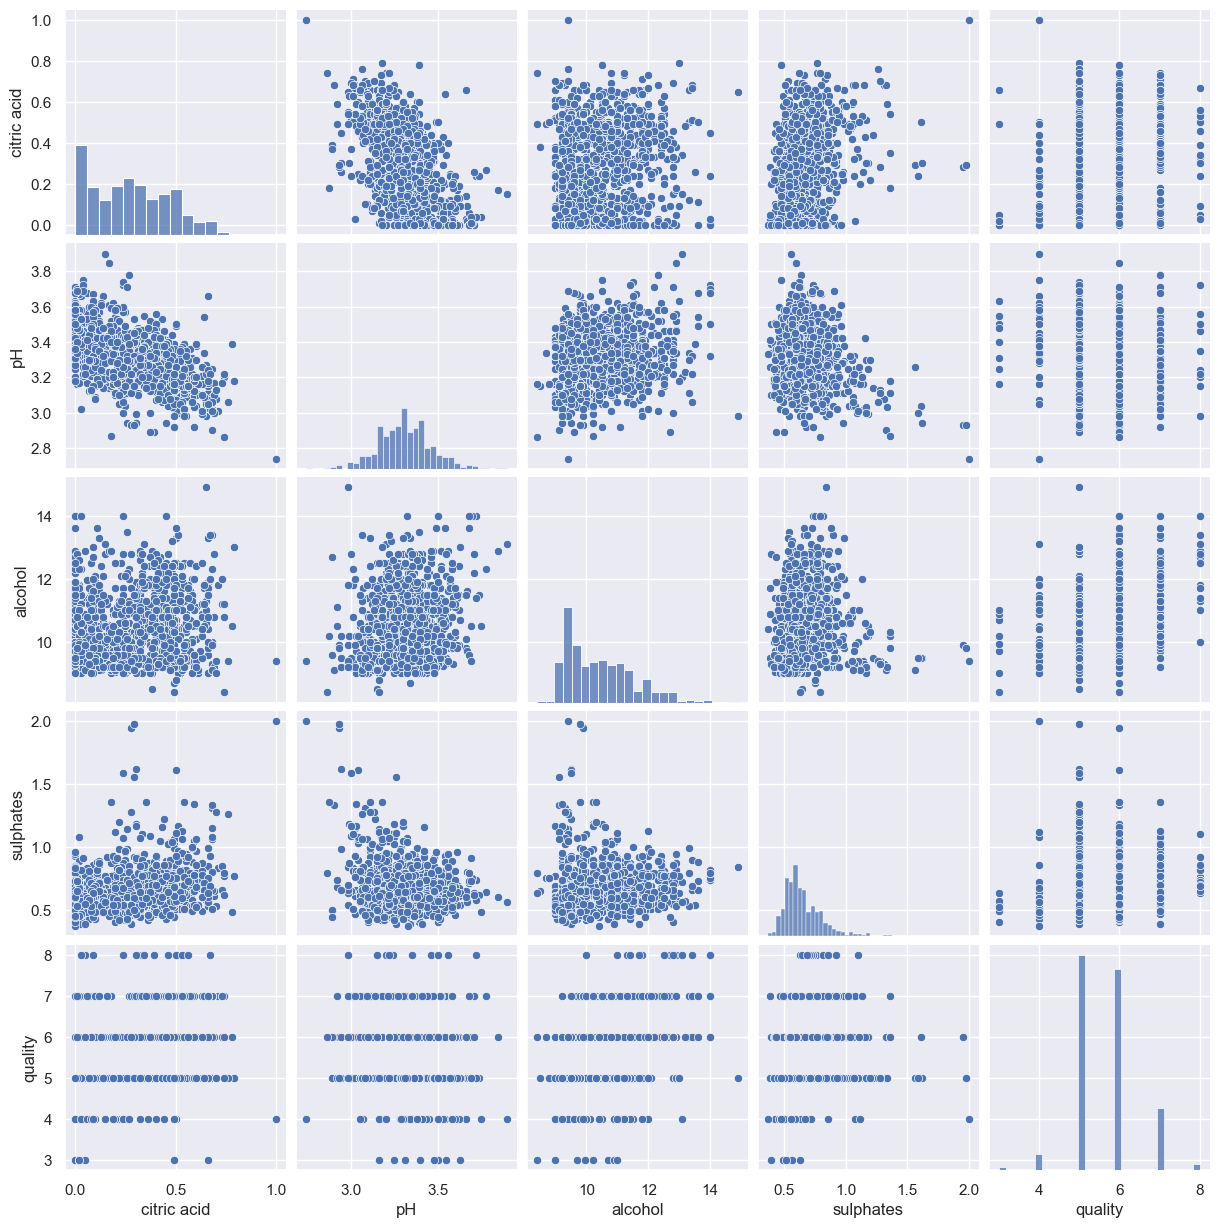

In [33]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
sns.pairplot(exploration_set[attribute_list])
plt.show()

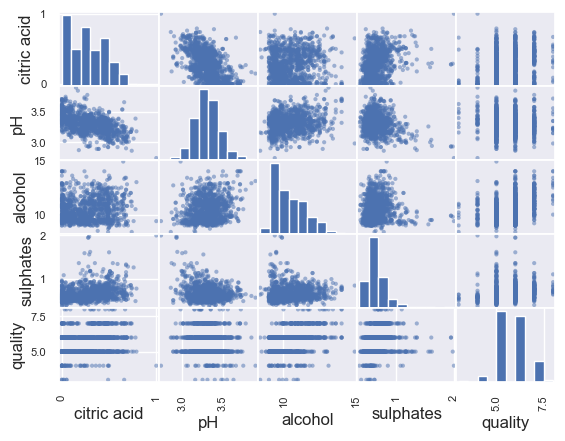

In [34]:
from pandas.plotting import scatter_matrix
scatter_matrix(exploration_set[attribute_list])
plt.show()

# Separate features and labels from the training set.

In [35]:
wine_features = strat_train_set.drop("quality", axis=1)

wine_labels = strat_train_set['quality'].copy()

In [36]:
wine_features.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

* `SimpleImputer` class for filling up missing values with. say, `median` value.
* The `strategy` contains instructions as how to replace the missing values.  In this case, we specify that the missing value should be replaced by the median value.  


In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [38]:
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

Note that these are median values for each feature.  We can cross-check it by calculating median on the feature set:

In [40]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [41]:
tr_features = imputer.transform(wine_features)

In [42]:
tr_features.shape

(1279, 11)

# Converting categories to numbers

In [43]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [44]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

# Transformation Pipeline

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

transform_pipeline = Pipeline([
                               ('imputer', SimpleImputer(strategy="median")),
                               ('std_scaler', StandardScaler()),])
transform_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

In [46]:
wine_features_tr = transform_pipeline.fit_transform(wine_features)

# Select and train ML model

* It's a good practice to build a quick baseline model on the preprocessed data and get an idea about model performance.

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

In [48]:
from sklearn.metrics import mean_squared_error

quality_predictions =  lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.4206571060060278

Let's evaluate performance on the test set.

* We need to first apply transformation on the test set and then apply the model prediction function.

In [49]:
wine_features_test = strat_test_set.drop("quality", axis=1)

wine_labels_test = strat_test_set['quality'].copy()

wine_features_test_tr = transform_pipeline.transform(wine_features_test)

quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.40636065372564323

Text(0, 0.5, 'Передбачення')

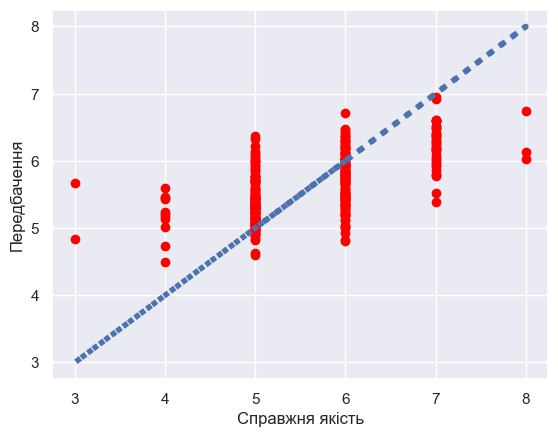

In [50]:
plt.scatter(wine_labels_test, quality_test_predictions, color = 'red')
plt.plot(wine_labels_test, wine_labels_test, 'b:', linewidth = 4)
plt.xlabel('Справжня якість')
plt.ylabel('Передбачення')


The model seem to be making errors on the best and poor quality wines.

In [51]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr, wine_labels)

DecisionTreeRegressor()

In [52]:
quality_predictions =  tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.0

In [53]:
quality_test_predictions = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.55

**Note that the training error is 0, while the test error is 0.58. This is an example of an overfitted model.**

Text(0, 0.5, 'Predicted quality')

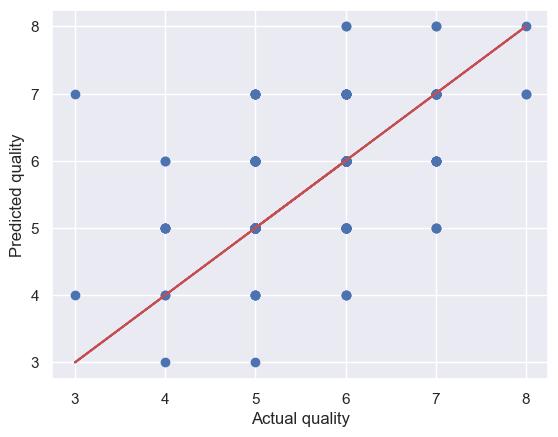

In [54]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [57]:
scores = cross_val_score(lin_reg, wine_features_tr, wine_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores: [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean: 0.431639217212196
Standard deviation: 0.08356359730413966


In [58]:
scores = cross_val_score(tree_reg, wine_features_tr, wine_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_mse_scores = -scores
display_scores(tree_mse_scores)

Scores: [0.546875   0.6953125  0.5859375  0.515625   0.515625   0.5546875
 0.6015625  0.796875   0.734375   1.04724409]
Mean: 0.6594119094488189
Standard deviation: 0.1580962915317793


In [59]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr, wine_labels)

scores = cross_val_score(forest_reg, wine_features_tr, wine_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_mse_scores = -scores
display_scores(forest_mse_scores)

Scores: [0.37048125 0.41673359 0.28749844 0.31930937 0.22085078 0.29746484
 0.27527578 0.40249609 0.41825781 0.45171339]
Mean: 0.34600813545767717
Standard deviation: 0.07235027158575617


In [60]:
quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.3307025

Text(0, 0.5, 'Predicted quality')

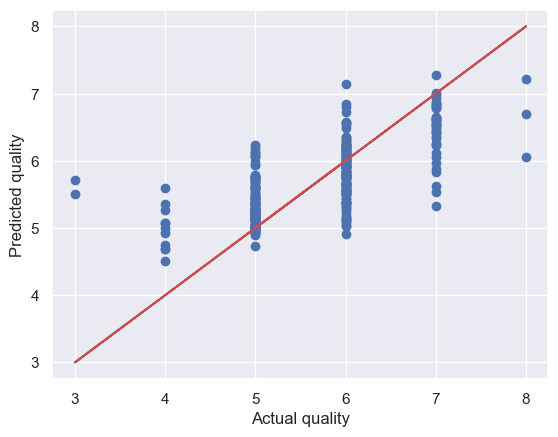

In [61]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

* Random forest looks more promising than the other two 

# Finetuning the  models

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [64]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [65]:
grid_search.fit(wine_features_tr, wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [66]:
 grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [67]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(-mean_score, params)

0.48288943355119807 {'max_features': 2, 'n_estimators': 3}
0.3942806678921568 {'max_features': 2, 'n_estimators': 10}
0.36619762731481476 {'max_features': 2, 'n_estimators': 30}
0.47970486111111105 {'max_features': 4, 'n_estimators': 3}
0.3829406556372549 {'max_features': 4, 'n_estimators': 10}
0.35170399645969497 {'max_features': 4, 'n_estimators': 30}
0.4836046432461873 {'max_features': 6, 'n_estimators': 3}
0.38387947303921566 {'max_features': 6, 'n_estimators': 10}
0.36034752178649243 {'max_features': 6, 'n_estimators': 30}
0.45119076797385615 {'max_features': 8, 'n_estimators': 3}
0.4017933823529411 {'max_features': 8, 'n_estimators': 10}
0.3643141816448801 {'max_features': 8, 'n_estimators': 30}
0.4492381535947712 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.37363155637254897 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4365339052287581 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3748141237745098 {'bootstrap': False, 'max_features

In [68]:
 grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

# Randomized Search

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [71]:
sorted(zip(feature_importances, feature_list), reverse=True)

[(np.float64(0.18996293324677918), 'alcohol'),
 (np.float64(0.1359541812078945), 'volatile acidity'),
 (np.float64(0.13257801251868945), 'sulphates'),
 (np.float64(0.09293515591088987), 'density'),
 (np.float64(0.08954040038267395), 'total sulfur dioxide'),
 (np.float64(0.06624148991298727), 'chlorides'),
 (np.float64(0.06551632735248412), 'fixed acidity'),
 (np.float64(0.0642409422316475), 'pH'),
 (np.float64(0.06214629052328853), 'citric acid'),
 (np.float64(0.056169792790624715), 'residual sugar'),
 (np.float64(0.04471447392204086), 'free sulfur dioxide')]


#### Evaluation on test set

Now that we have a reasonable model, we evaluate its performance on the test set.

In [72]:
wine_features_test = strat_test_set.drop("quality", axis=1)

wine_labels_test = strat_test_set['quality'].copy()

wine_features_test_tr = transform_pipeline.transform(wine_features_test)

In [73]:
quality_test_predictions = grid_search.best_estimator_.predict(
    wine_features_test_tr)

In [74]:
mean_squared_error(wine_labels_test, quality_test_predictions)

0.3243020833333333

**It's a good idea to get  95%  confidence interval of the evaluation metric. It can be obtained by the following code**

In [75]:
from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predictions - wine_labels_test) ** 2
stats.t.interval(confidence, len(squared_errors) - 1,
                 loc=squared_errors.mean(),
                 scale=stats.sem(squared_errors))

(np.float64(0.2507693315696341), np.float64(0.39783483509703255))

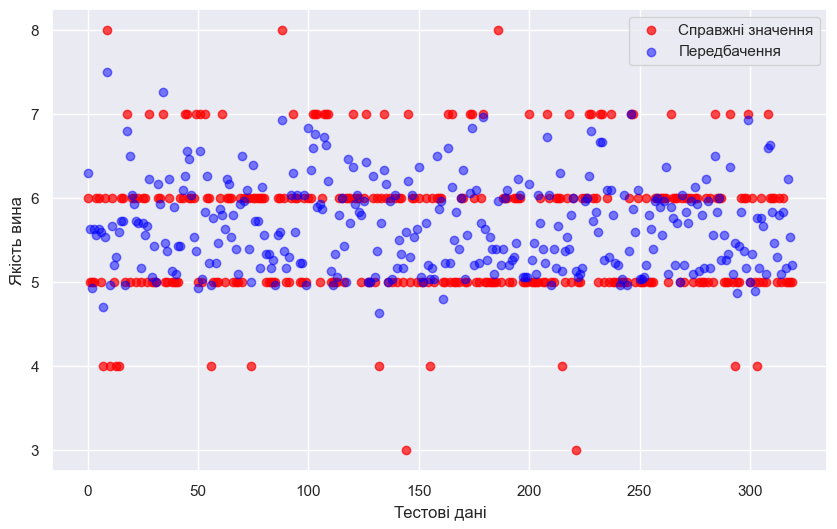

In [76]:
plt.figure(figsize=(10, 6))

plt.scatter(range(len(wine_labels_test)), wine_labels_test, color='red', alpha=0.7, label='Справжні значення')

plt.scatter(range(len(wine_labels_test)), quality_test_predictions, color='blue', alpha=0.5, label='Передбачення')

plt.xlabel('Тестові дані')
plt.ylabel('Якість вина')
plt.legend()

plt.show()


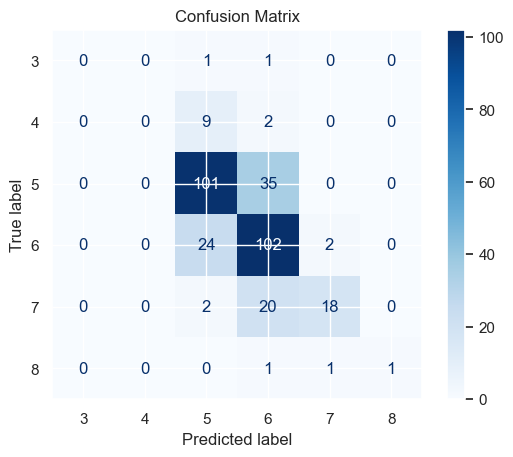

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.74      0.74       136
           6       0.63      0.80      0.71       128
           7       0.86      0.45      0.59        40
           8       1.00      0.33      0.50         3

    accuracy                           0.69       320
   macro avg       0.54      0.39      0.42       320
weighted avg       0.68      0.69      0.68       320

Accuracy: 0.6937


In [77]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

actual_rounded = wine_labels_test.round()
predicted_rounded = quality_test_predictions.round()

conf_matrix = confusion_matrix(actual_rounded, predicted_rounded)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                               display_labels=sorted(wine_labels_test.unique()))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(actual_rounded, predicted_rounded, zero_division=0))

accuracy = accuracy_score(actual_rounded, predicted_rounded)
print(f"Accuracy: {accuracy:.4f}")


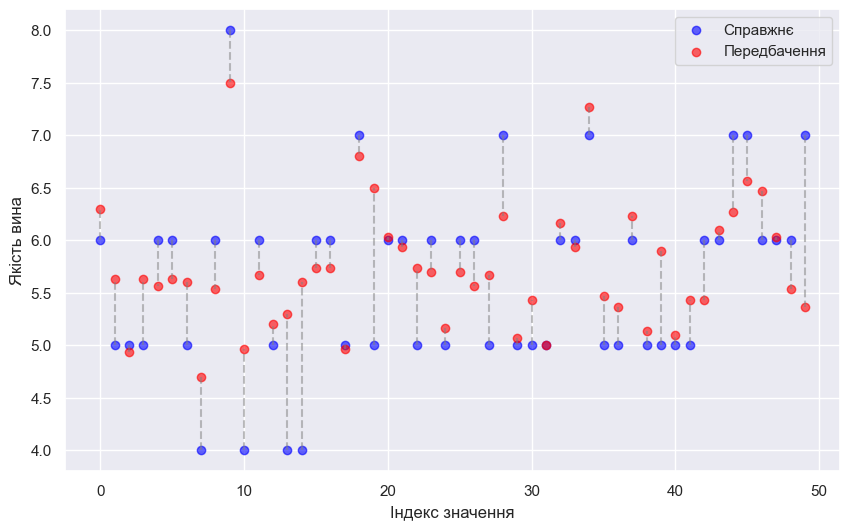

In [78]:
import matplotlib.pyplot as plt
import numpy as np

num_points = 50

subset_actual = wine_labels_test[:num_points].reset_index(drop=True) 
subset_predicted = quality_test_predictions[:num_points]

indices = np.arange(num_points)

plt.figure(figsize=(10,6))

plt.scatter(indices, subset_actual, color='blue', label='Справжнє', alpha=0.6)

plt.scatter(indices, subset_predicted, color='red', label='Передбачення', alpha=0.6)

for i in range(num_points):
    plt.plot([indices[i], indices[i]], [subset_actual[i], subset_predicted[i]], color='gray', linestyle='--', alpha=0.5)

plt.xlabel('Індекс значення')
plt.ylabel('Якість вина')
plt.legend()

plt.show()
